# Importing the handwritten dataset

The dataset we will be using in this tutorial is called the MNIST dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset:
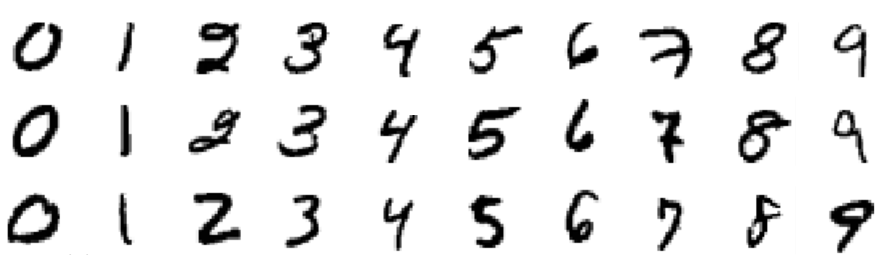

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist                             # Get the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # load_data() method returns a splitted dataset with train set and test set

Train set contains 60,000 images, and test set contains 10,000 images

In [ ]:
print("Train samples: ", len(x_train))
print("Test samples: ",len(x_test))

Train samples:  60000
Test samples:  10000


And each image's resolution is 28x28 pixels. The value of each pixel ranges from 0 to 255. 0 represents black, and 255 represents white.

In [ ]:
print(x_train[0].shape)

(28, 28)


In [ ]:
# show the first 5 labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Label of the image is:  5


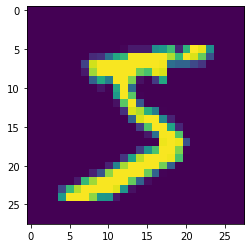

In [ ]:
# Let's visualise an example:

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print("Label of the image is: ", y_train[0])

# Data preprocessing

First, we need to scale the data so that the pixel values are from 0 - 1. This helps Gradient Descent to converge faster

In [ ]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

Then, we need to convert the two-dimensional input data into a single-dimensional format for feeding into the model. This is achieved by a process called flattening. In this process, the 28x28 grid image is converted into a single-dimensional array of 784 (which is 28x28).

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [ ]:
x_train_flattened.shape

(60000, 784)

In [ ]:
x_test_flattened.shape

(10000, 784)

# Create our Neural Network

We will create a neural network with 4 layers: 1 input layer, 2 hidden layers, and 1 output layer to do our task. We don't know what's the best structure to build our NN to classify handwritten digits, you have to try numerous combination and pick the best one. This is the nature of building NN.

The hyperparameters to tune are the number of neurons, activation function, optimizer, learning rate, batch size, and epochs.

In [ ]:
# Sequential create a stack of layers
model = tf.keras.models.Sequential()

# Add our input layer
model.add(tf.keras.layers.InputLayer(input_shape=28*28))            # Input shape is the dimension of flatten images
# Add our 1st hidden layer
model.add(tf.keras.layers.Dense(units=32, activation='relu'))       # 1st hidden layer with 64 units, you can tweak it to any number you want 
# Add our 2nd hidden layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))      # 2nd hidden layer with 128 units, you can tweak it to any number you want
# Add our output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))    # output layer with 10 units because we have 10 digits to classify (0, 1, ..., 9) 

A short activation functions cheat sheet:


*   Sigmoid: output value is between 0..1 -> use when we want to predict probabilities
*   Tanh: Tanh is also like sigmoid but better. The range of the tanh function is from (-1 to 1)
*   ReLU: ReLU is excellent for hidden layer activation because it doesn’t suffer the vanishing gradient problem. 
*   Softmax: output a probability distribution over each of the N inputs. We usually use softmax in the last layer of our multi-class classifier networks. A key characteristic about this output distribution is that all the probabilities add up to 1.


In [ ]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='SGD',                            # We use SGD because tf doesn't support GD, and SGD is a much better optimizer. You can change it to any optimizer algo you want 
    loss='sparse_categorical_crossentropy',     # We use this loss function because we want to categorise digits. This is also a hyperparameter, but you need to choose the correct loss function, otherwise the NN won't learn correctly
    metrics=['accuracy']                        # We want to evaluate the models based on accuracy, there are other metrics as well but accuracy is the most common
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7338 - accuracy: 0.7970
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3205 - accuracy: 0.9076
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2375 - accuracy: 0.9308
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2138 - accuracy: 0.9384


A short loss function cheat sheet:


*   categorical_crossentropy: Use when you want to categorise multiple classes, and your labels are one-hot encoded, such as: y[0] = [0,0,1,0].
*   sparse_categorical_crossentropy: Use when you want to categorise multiple classes, but your labels are integers, such as: y[0] = 2



# Evaluate the accuracy of test data

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2012 - accuracy: 0.9387


In [ ]:
print("Test accuracy: ", test_accuracy)
print("Test loss: ", test_loss)

Test accuracy:  0.9387000203132629
Test loss:  0.2011776715517044


# Do some predictions

We will now visualize the result by showing the image and making the prediction and validating it

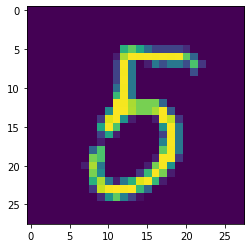

In [ ]:
# Show the image
plt.imshow(x_test[45])

In [ ]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[45]

array([1.4329790e-02, 1.0537857e-04, 1.8483600e-04, 4.6233632e-02,
       9.7007467e-04, 9.1819698e-01, 3.5331666e-04, 3.1410029e-05,
       1.5685234e-02, 3.9093690e-03], dtype=float32)

In [ ]:
# Find the maximum value using numpy
import numpy as np
prediction = np.argmax(y_predicted[45])
print("Predicted label is: ", prediction)

Predicted label is:  5


In the example above, even though the digit looks really close to number 6, but our network is still able to classify it as number 5. What an excellent intelligence!

For more intuition about Neural Network with handwritten digits recogniser, I find this video is a great resource: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi